In [1]:
from RRR import *
from rankProject import *
from cliqueProject import *

n = 5

H = np.array(
    [[0, 1, 1, 1, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]])

A = semiDefProject(np.random.rand(n, n))

print A

[[ 0.0977954   0.20007082  0.37633023  0.27575513  0.80630665]
 [ 0.20007082  0.29747995  0.58781062  0.71678341  0.51112758]
 [ 0.37633023  0.58781062  0.97270573  0.42570297  0.72869828]
 [ 0.27575513  0.71678341  0.42570297  0.17682844  0.91038598]
 [ 0.80630665  0.51112758  0.72869828  0.91038598  0.93183113]]


In [5]:
n = 125
from graphReader import getGraph
H = getGraph()

In [6]:
def verifyClique(c, H):
    r = 1
    for i in range(len(c)):
        for j in range(i+ 1, len(c)):
            r = r*H[c[i], c[j]]
    return r

In [7]:
k = 34

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

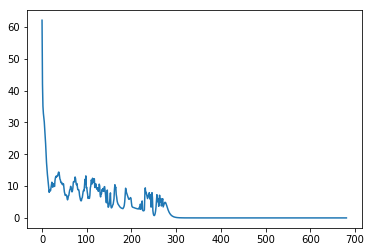

In [10]:
plt.plot(errors)
plt.show()

In [13]:
print extractClique(sols)
print verifyClique(extractClique(sols), H)
print len(extractClique(sols))

[  4   6   8  10  12  18  28  30  33  34  39  43  44  48  49  51  54  65
  66  67  69  76  79  90  95  97  98 102 103 109 113 116 121 124]
1.0
34


This is the best result so far. The other notebook is thrashing for $k=35$, and could barely do $k=33$.

Let's see if it is possible to get better.

In [14]:
k = 35

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

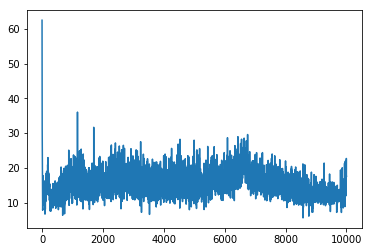

In [15]:
plt.plot(errors)
plt.show()

So, $k = 35$ is a genuinely difficult problem, it would appear.

Let's do the same loop as the other notebook. One or the other might converge.

In [24]:
while(True):
    Y, errors2, sols = RRR(Y,
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 1000, True)
    errors += errors2
    if errors[-1] < 1e-4:
        break



KeyboardInterrupt: 

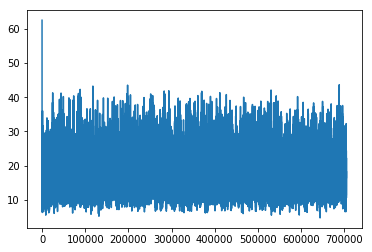

In [25]:
plt.plot(errors)
plt.show()

In [21]:
q = [  4,  6,   8,  10,  12,  18,  28,  30,  33,  34 , 39 , 43,  44,  48,  
     49,  51,  54,  65, 66,  67,  69,  76,  79,  90,  95,  97,  98, 102, 103, 109, 113, 116, 121, 124]

for u in range(125):
    if u not in q:
        r = q + [u]
        if verifyClique(r, H) > 0.9:
            print r
            break

In [23]:
verifyClique(q, H)

1.0

In [26]:
s = [x + 1 for x in q]
print s

[5, 7, 9, 11, 13, 19, 29, 31, 34, 35, 40, 44, 45, 49, 50, 52, 55, 66, 67, 68, 70, 77, 80, 91, 96, 98, 99, 103, 104, 110, 114, 117, 122, 125]


The above represents the longest clique I could find, size $34$. I could not find anything at $35$ despite a night of letting the machine run.